In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import hmmnormsigmaonly as hmm
import importlib


from hmmlearn import hmm as hml
import Function_garch as fg


data = fg.load_Sp500()
logreturns = fg.logf_diff(data)

ret2000 = logreturns["2000"]
ret2004 = logreturns["2004"]
ret2008 = logreturns["2008"]
ret2012 = logreturns["2012"]
ret2016 = logreturns["2016"]


data2 = fg.load_nasdaq()
logreturns = fg.logf_diff(data2)

ret2000_n = logreturns["2000"]
ret2004_n = logreturns["2004"]
ret2008_n = logreturns["2008"]
ret2012_n = logreturns["2012"]
ret2016_n = logreturns["2016"]


def ImplementOptim(logreturns):
    optim = hmm.optimize(logreturns)
    optimparam = optim.x
    p1filt, p2filt = hmm.generate_p(optimparam,logreturns)
    states = hmm.hmm(p1filt,p2filt)
    var1 = optimparam[1]
    sigma1 = math.sqrt(var1)
    var2 = optimparam[4]
    sigma2 = math.sqrt(var2)
    pfiltnorm = p1filt*var1 + p2filt*var2

    
    print(p1filt)
    print(p2filt)

    print(sigma1)
    print(sigma2)
    
    return states, pfiltnorm




def plot(returns):

    x= range(len(returns))
    y_ret = returns
    y_garch = fg.generer_estime(np.array(returns))[1]
    
    y_states, y_pfilt = ImplementOptim(returns)
    
    fig, axs = plt.subplots(2, 1)
    
    
    axs[0].plot(x, y_garch * np.sqrt(252), label = "Garch")
    
    axs[0].plot(x, y_pfilt * np.sqrt(252), label="Hmm")
    

    
    axs[0].legend(['Vol','Garch', 'Hmm'])
    
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Volatility')
    axs[0].grid(True)
    
    axs[1].plot(x, y_ret)
   
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Return')
    axs[1].grid(True)

    plt.show()


#states2000,pfilt2000 = ImplementOptim(ret2000)
#states2004,pfilt2004 = ImplementOptim(ret2004)
#states2008,pfilt2008 = ImplementOptim(ret2008)
#states2012,pfilt2012 = ImplementOptim(ret2012)
#states2016, pfilt2016 = ImplementOptim(ret2016)

#plot(ret2000,pfilt2000)
#plot(ret2004,pfilt2004)
#plot(ret2008,pfilt2008)
#plot(ret2012,pfilt2012)
#plot(ret2016,pfilt2016)





[0.58685322 0.99638549 0.97863089 ... 0.03257334 0.05152368 0.04228659]
[0.41314678 0.00361451 0.02136911 ... 0.96742666 0.94847632 0.95771341]
1.414213533168702
0.8947456771352361


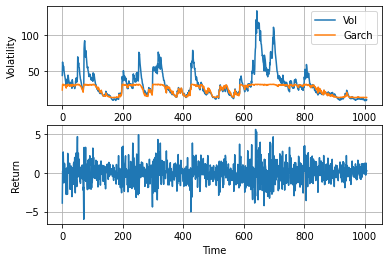

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
0.7674947370256102
0.7674947370256143


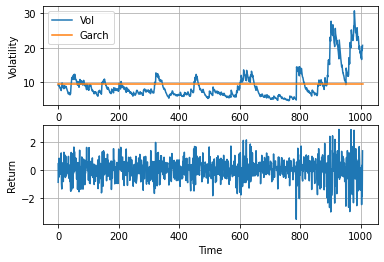

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
1.4142135623730951
1.4142135623730951


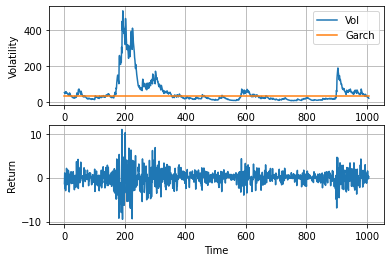

[5.84158166e-01 7.46925470e-01 8.42625595e-01 ... 4.22688441e-05
 2.55808053e-02 1.93265573e-01]
[0.41584183 0.25307453 0.15737441 ... 0.99995773 0.97441919 0.80673443]
0.5207640441043995
1.097404654299035


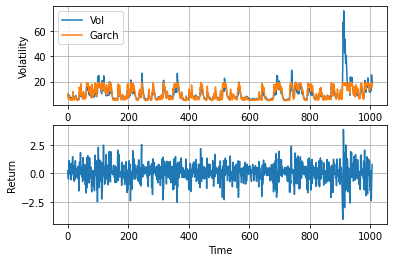

[0.27841284 0.95464379 0.99999271 ... 0.02884156 0.0226011  0.03123484]
[7.21587159e-01 4.53562065e-02 7.28906372e-06 ... 9.71158440e-01
 9.77398901e-01 9.68765164e-01]
1.3389903445998403
0.462060859444202


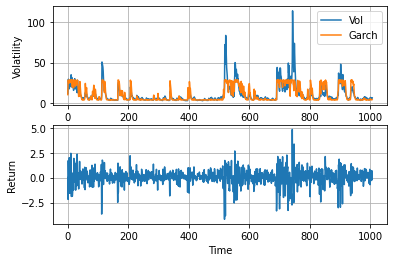

In [24]:

plot(ret2000)
plot(ret2004)
plot(ret2008)
plot(ret2012)
plot(ret2016)



[0.50002544 0.50002544 0.50002544 ... 0.50002544 0.50002544 0.50002544]
[0.49997456 0.49997456 0.49997456 ... 0.49997456 0.49997456 0.49997456]
1.4142135623730951
1.4142135623730951


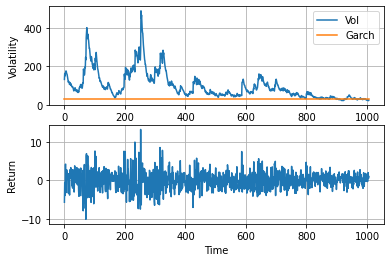

[0.43209204 0.37464538 0.42641655 ... 0.9999679  0.98095818 0.99798301]
[5.67907960e-01 6.25354621e-01 5.73583451e-01 ... 3.20956070e-05
 1.90418171e-02 2.01698600e-03]
1.2446151932586749
0.7578559751873838


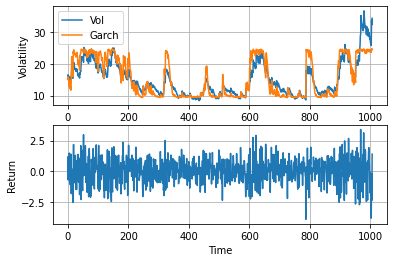

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
1.4142135623730951
1.4142135623730951


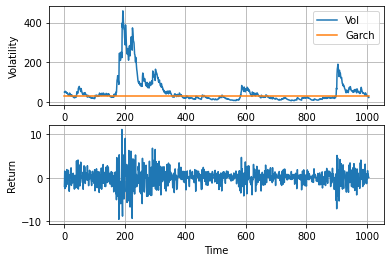

[5.83869376e-01 7.25385468e-01 7.97640465e-01 ... 4.47898407e-05
 6.62585296e-02 2.51337216e-01]
[0.41613062 0.27461453 0.20235954 ... 0.99995521 0.93374147 0.74866278]
0.6320522247932218
1.234842367699553


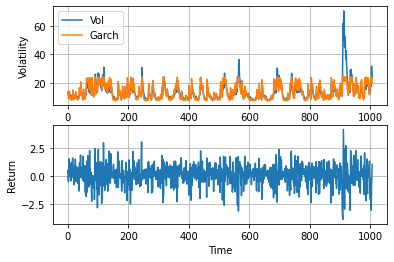

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
0.9981699549767017
0.9981699549767017


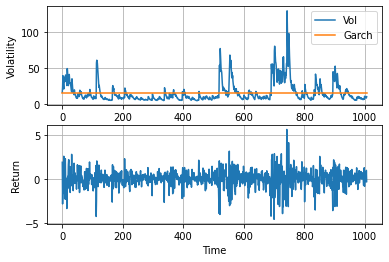

In [25]:

plot(ret2000_n)
plot(ret2004_n)
plot(ret2008_n)
plot(ret2012_n)
plot(ret2016_n)